In [182]:
### To predict solar_generation
# Inputs:
# current_solar_generation

# month = observation[0]
### hour = observation[2]

# outdoor_dry_bulb_temperature = observation[3]

# outdoor_relative_humidity = observation[7]

# diffuse_solar_irradiance = observation[11]
### diffuse_solar_irradiance_predicted_6h = observation[12]

# direct_solar_irradiance = observation[15]
### direct_solar_irradiance_predicted_6h = observation[16]

# Labels
# next_solar_generation = observation[21]

In [183]:
from data import citylearn_challenge_2022_phase_1 as competition_data
import os.path as osp
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np


weather_path = osp.join(osp.dirname(competition_data.__file__), "weather.csv")
building_1_path = osp.join(osp.dirname(competition_data.__file__), "Building_1.csv")

df_building_1_all = pd.read_csv(building_1_path)
df_building_1 = df_building_1_all[["Month", "Hour"]]

In [184]:
from datetime import datetime, timedelta

start = datetime.strptime('2000-08-01', '%Y-%m-%d')

all_dates = [start + timedelta(hours=x) for x in range(8760)]

In [185]:
df_weather_all = pd.read_csv(weather_path)
df_weather = df_weather_all[["Outdoor Drybulb Temperature [C]", "Relative Humidity [%]", "Diffuse Solar Radiation [W/m2]", "Direct Solar Radiation [W/m2]"]]

df_building_1_current_solar_generation = df_building_1_all[["Solar Generation [W/kW]"]]
df_labels_building_1 = df_building_1_all[["Solar Generation [W/kW]"]]
df_labels_building_1 = df_labels_building_1.shift(-1)

In [186]:
df_data_building_1 = df_weather
df_data_building_1["Solar Generation [W/kW]"] = df_building_1_current_solar_generation

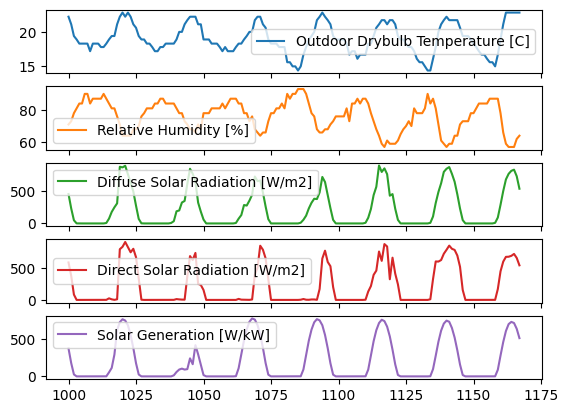

In [187]:
ax = df_data_building_1[1000:1168][list(df_data_building_1.columns)].plot(subplots=True)

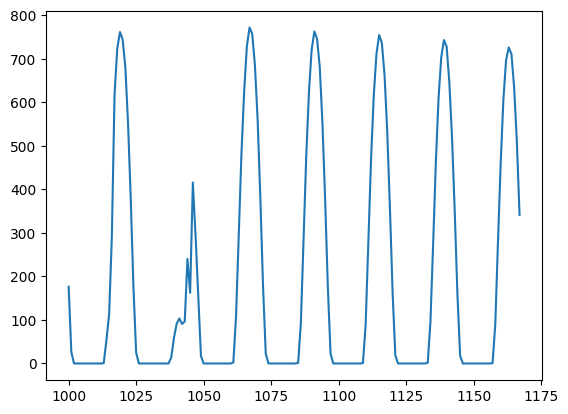

In [188]:
plt.plot(df_labels_building_1[1000:1168])

In [189]:
df_data_building_1["ds"] = all_dates
df_data_building_1["y"] = df_labels_building_1

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

# df_data_building_1.set_index('ds', inplace=True)
df_data_building_1.sort_index(inplace=True)
X = df_data_building_1.drop(labels=['y'], axis=1)
y = df_data_building_1['y']

In [197]:
X

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],Solar Generation [W/kW],ds
0,20.0,84.0,0.0,0.0,0.000000,2000-08-01 00:00:00
1,20.1,79.0,0.0,0.0,0.000000,2000-08-01 01:00:00
2,19.7,78.0,0.0,0.0,0.000000,2000-08-01 02:00:00
3,19.3,78.0,0.0,0.0,0.000000,2000-08-01 03:00:00
4,18.9,78.0,0.0,0.0,0.000000,2000-08-01 04:00:00
...,...,...,...,...,...,...
8755,20.6,84.0,26.0,130.0,8.004167,2001-07-31 19:00:00
8756,21.1,81.0,0.0,0.0,0.000000,2001-07-31 20:00:00
8757,21.7,79.0,0.0,0.0,0.000000,2001-07-31 21:00:00
8758,21.3,76.0,0.0,0.0,0.000000,2001-07-31 22:00:00


In [202]:
from neuralprophet import NeuralProphet

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train = pd.concat([X_train, y_train], axis=1)
    test = pd.concat([X_test, y_test], axis=1)
    print(train)

    m = NeuralProphet()
    metrics = m.fit(train, freq='auto', validation_df=test, progress='plot')


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


      Outdoor Drybulb Temperature [C]  Relative Humidity [%]  \
0                                20.0                   84.0   
1                                20.1                   79.0   
2                                19.7                   78.0   
3                                19.3                   78.0   
4                                18.9                   78.0   
...                               ...                    ...   
1455                             22.2                   68.0   
1456                             21.7                   71.0   
1457                             21.1                   68.0   
1458                             18.9                   78.0   
1459                             18.9                   81.0   

      Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                 

ValueError: Unexpected column Outdoor Drybulb Temperature [C] in data

SyntaxError: invalid syntax (1136315542.py, line 3)